In [54]:
%pylab inline
from tensorflow.examples.tutorials.mnist import input_data                                                                                                                                                                                    
from deepx.nn import *                                                                                                                                                                                                                        
from deepx.loss import *                                                                                                                                                                                                                      
from deepx.optimize import *
from tqdm import tqdm
import cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# MNIST

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [55]:
deepnet = Vector(784) >> Tanh(200) >> Tanh(200) >> Softmax(10)                                                                                                                                                                                
rmsprop = RMSProp(deepnet, CrossEntropy())

0.9462


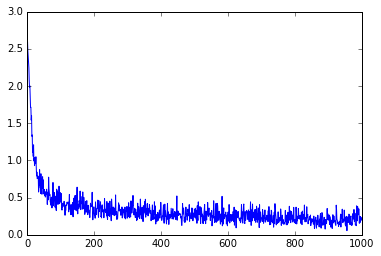

In [56]:
loss = []
for i in tqdm(range(1000)):                                                                                                                                                                                                                         
    batch_xs, batch_ys = mnist.train.next_batch(100)                                                                                                                                                                                          
    loss.append(rmsprop.train(batch_xs, batch_ys, 1)                                                                                                                                                                                                )
plt.plot(loss)                                                                                                                                                                                                                                              
Xtest, ytest = mnist.test.images, mnist.test.labels                                                                                                                                                                                           
results = deepnet.predict(Xtest)                                                                                                                                                                                                              
print float(sum(results.argmax(axis=1) == ytest.argmax(axis=1))) / Xtest.shape[0]

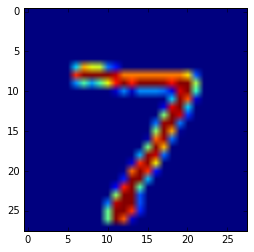

In [26]:
test_image = mnist.test.images[0]
imshow(test_image.reshape((28, 28)))

In [28]:
deepnet.predict(test_image[None])

array([[  3.16981568e-05,   5.93791718e-08,   3.76314245e-04,
          5.11580904e-04,   7.61385422e-07,   4.62258358e-05,
          3.67676805e-08,   9.98610497e-01,   3.05877547e-05,
          3.92225105e-04]], dtype=float32)

In [29]:
deepnet.predict(test_image[None]).argmax()

7

# CIFAR

In [32]:
from load_cifar import cifar10

X, y, Xtest, ytest = cifar10()
convnet = Image((1, 32, 32)) >> Conv((64, 3, 3), activation=Relu) >> Conv((64, 3, 3), activation=Relu) >> Flatten() >> Relu(384) >> Relu(192) >> Softmax(10)
with open('cifar.pkl') as fp:
    convnet.set_state(pickle.load(fp))

6

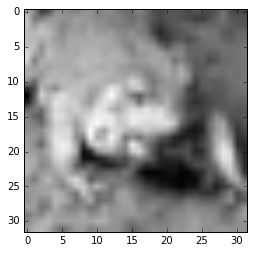

In [49]:
imshow(Xtest[5, 0], cmap="gray")
ytest[5].argmax()

In [51]:
convnet.predict(Xtest[5:6])

array([[  6.64008574e-20,   9.35429899e-15,   3.94755924e-13,
          1.73717691e-15,   1.24748096e-08,   2.54175926e-17,
          1.00000000e+00,   9.65786119e-16,   1.31345204e-16,
          1.27425667e-15]], dtype=float32)

In [52]:
convnet.predict(Xtest[5:6]).argmax()

6